# 2. Perform image processing with `piXedfit_images` module
<font size="4"> In this step, we perform image processing, which is a process of matching multiband imaging data in both spatial resolution and sampling. Basically, this process includes PSF matching and spatial resampling and reprojection. In this demo, we will perform image processing using `piXedfit.piXedfit_images.images_processing` class. </font>

In [1]:
import numpy as np
from astropy.io import fits
import os, sys
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME)

%matplotlib inline

In [2]:
# calling images_processing class
from piXedfit.piXedfit_images import images_processing

## 2.1. Preparing inputs

In [3]:
# list the filters
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 
           'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']

# input science images
sci_img = {}
sci_img['galex_fuv'] = 'GI1_009100_NGC0309-fd-intbgsub.fits'
sci_img['galex_nuv'] = 'GI1_009100_NGC0309-nd-intbgsub.fits'
sci_img['sdss_u'] = 'frame-u-001740-3-0115.fits'
sci_img['sdss_g'] = 'frame-g-001740-3-0115.fits'
sci_img['sdss_r'] = 'frame-r-001740-3-0115.fits'
sci_img['sdss_i'] = 'frame-i-001740-3-0115.fits'
sci_img['sdss_z'] = 'frame-z-001740-3-0115.fits'
sci_img['2mass_j'] = 'skybgsub_aJ_asky_001022s0620186.fits'
sci_img['2mass_h'] = 'skybgsub_aH_asky_001022s0620186.fits'
sci_img['2mass_k'] = 'skybgsub_aK_asky_001022s0620186.fits'
sci_img['wise_w1'] = 'skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
sci_img['wise_w2'] = 'skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

# input Variance images
var_img = {}
var_img['galex_fuv'] = 'var_GI1_009100_NGC0309-fd-intbgsub.fits'
var_img['galex_nuv'] = 'var_GI1_009100_NGC0309-nd-intbgsub.fits'
var_img['sdss_u'] = 'var_frame-u-001740-3-0115.fits'
var_img['sdss_g'] = 'var_frame-g-001740-3-0115.fits'
var_img['sdss_r'] = 'var_frame-r-001740-3-0115.fits'
var_img['sdss_i'] = 'var_frame-i-001740-3-0115.fits'
var_img['sdss_z'] = 'var_frame-z-001740-3-0115.fits'
var_img['2mass_j'] = 'var_skybgsub_aJ_asky_001022s0620186.fits'
var_img['2mass_h'] = 'var_skybgsub_aH_asky_001022s0620186.fits'
var_img['2mass_k'] = 'var_skybgsub_aK_asky_001022s0620186.fits'
var_img['wise_w1'] = 'var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
var_img['wise_w2'] = 'var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977
stamp_size = [131,131]

## 2.2. Call images_processing class

In [4]:
img_process = images_processing(filters=filters,sci_img=sci_img,var_img=var_img,gal_ra=gal_ra,gal_dec=gal_dec,
                                gal_z=gal_z,stamp_size=stamp_size)

<font size="4"> __Run image processing__. This process will bring all the images into the same spatial resolution and sampling. </font>

In [5]:
output_stamps = img_process.reduced_stamps()

[PSF matching to wise_w2]
[produce crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_frame-u-001740-3-0115.fits]
[produce crop_var_frame-u-001740-3-0115.fits]
[PSF matching]
[produce psfmatch_crop_frame-u-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-u-001740-3-0115.fits]
[produce crop_frame-g-001740-3-0115.fits]
[produce crop_var_frame-g-001740-3-0115.fits]
[PSF matching]
[produce psfmatch_crop_frame-g-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-g-001740-3-0115.fits]
[produce crop_frame-r-001740-3-0115.fits]
[produce crop_var_frame-

<font size="4"> Check results of images processing: stamps of reduced images. </font>

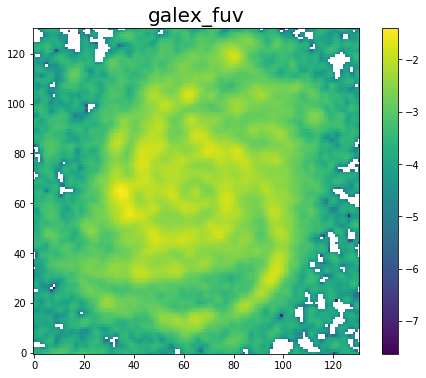

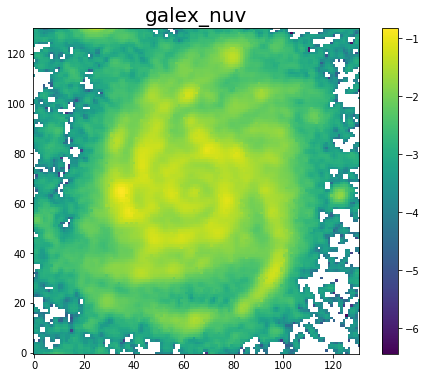

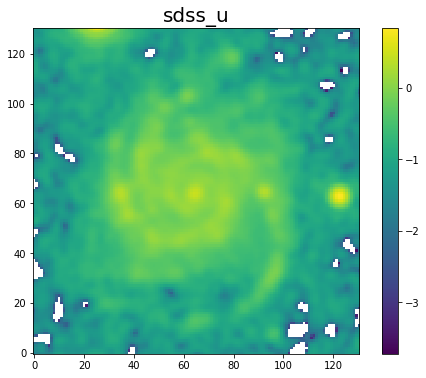

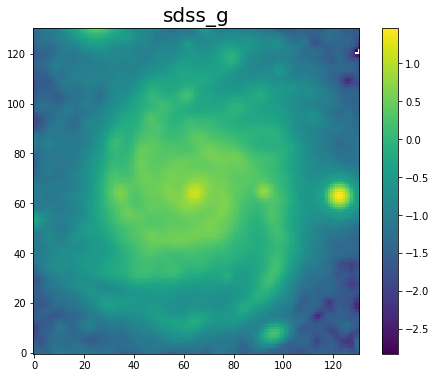

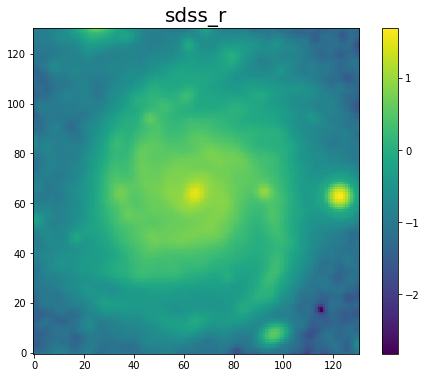

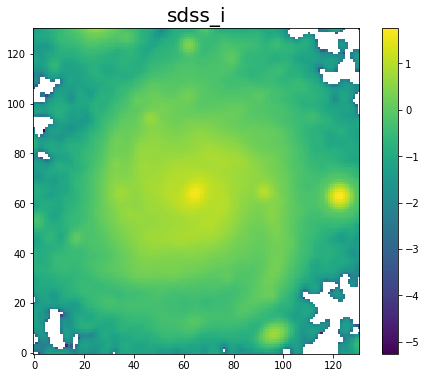

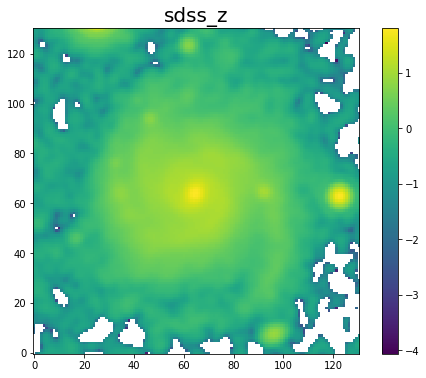

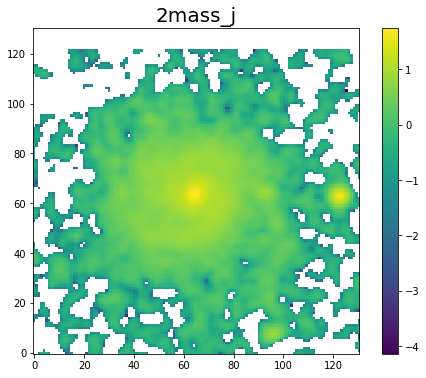

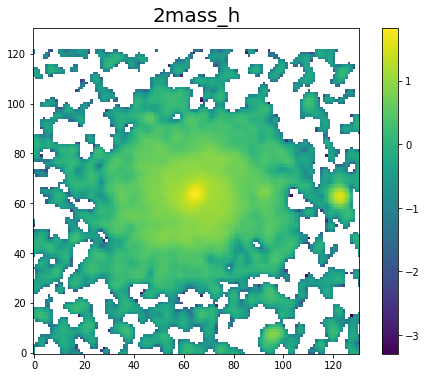

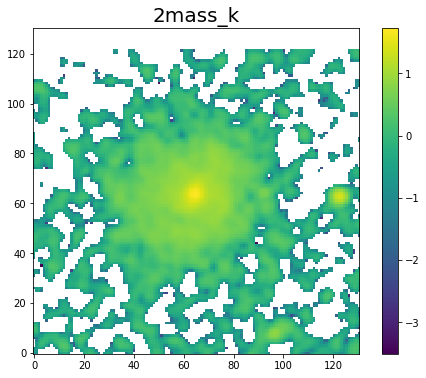

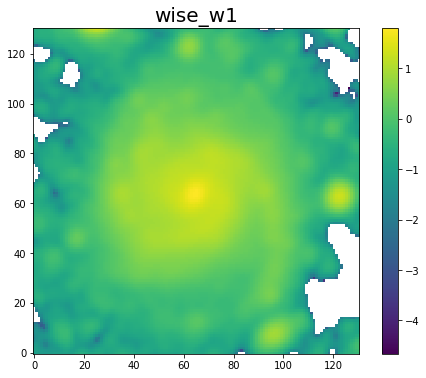

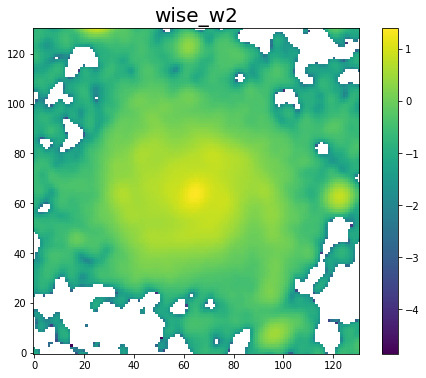

In [6]:
%matplotlib inline

nbands = len(filters)
for bb in range(0,nbands):
    str_temp = "name_img_%s" % filters[bb]
    hdu = fits.open(output_stamps[str_temp])
    data_image = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(8,6))
    f1 = plt.subplot()
    plt.title("%s" % filters[bb], fontsize=20)
    plt.imshow(np.log10(data_image), origin='lower')
    plt.colorbar()

## 2.3. Define galaxy's region of interest
<font size="4"> Basically, users are free to define the region of the galaxy. The selected region should be stored in a 2D array (e.g., `gal_region`) with the same size to the stamp images produced after the image processing. In the `gal_region` array, pixels belong to the galaxy's region should be given value 1 and 0 otherwise.

Although the region can be freely defined, __piXedfit__ provides two options to assist on this: (1) using SEP (__[link](https://sep.readthedocs.io/en/v1.0.x/index.html)__) segmentation, and (2) using elliptical/circular aperture. In this demo, we will try these two options, but at the end we will use the result based on the SEP segmentation.</font>

### 2.3.1. Based on SEP segmentation maps

<font size="4"> This can be done using `segmentation_sep` function. </font>

In [7]:
segm_maps = img_process.segmentation_sep(output_stamps=output_stamps, thresh=2.8, minarea=100, 
                             deblend_nthresh=40, deblend_cont=0.005)

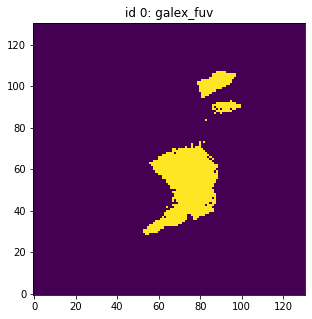

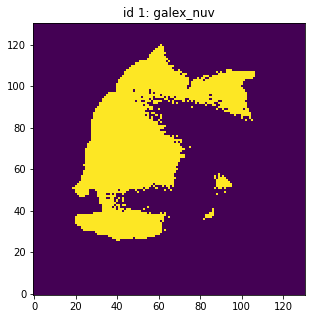

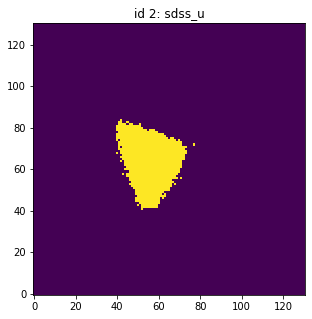

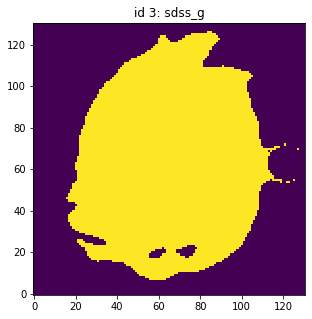

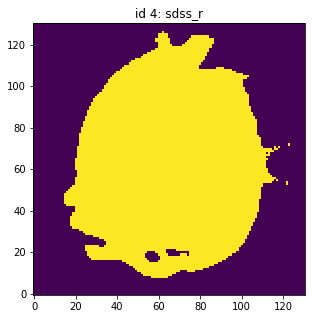

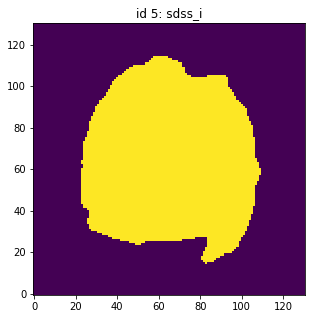

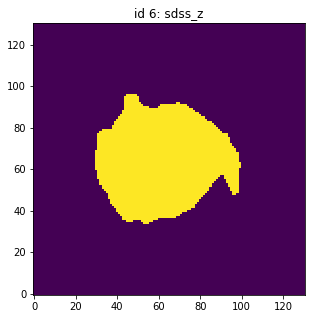

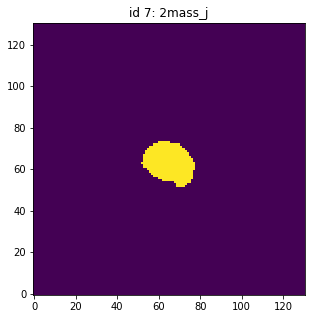

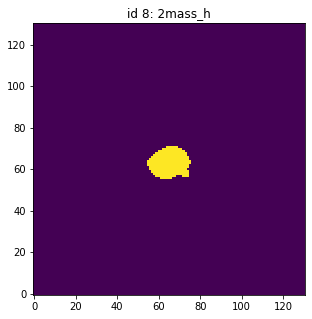

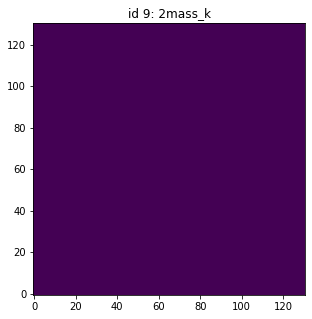

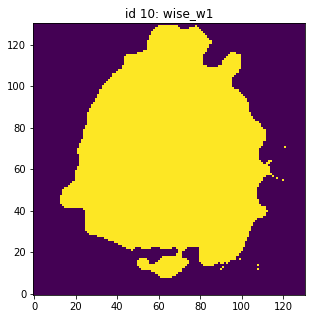

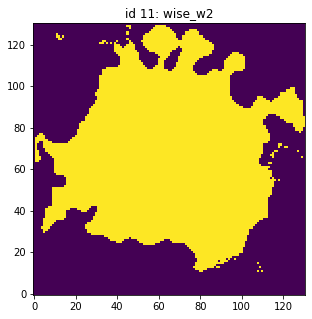

In [8]:
# Check output segmentation maps
for ii in range(0,nbands):
    fig1 = plt.figure(figsize=(5,5))
    f1 = plt.subplot()
    plt.title("id %d: %s" % (ii,filters[ii]))
    plt.imshow(segm_maps[ii], origin='lower')

<font size="4"> Select segmentation maps and merge them to form a galaxy region. Let's name it `gal_region1`. This can be done using an instance method `galaxy_region`. </font>

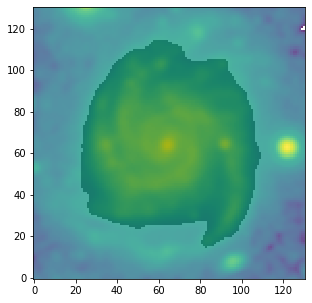

In [9]:
# select segmentation maps
select_ids = [5, 6]
select_segm_maps = []
for ii in select_ids:
    select_segm_maps.append(segm_maps[ii])

gal_region1 = img_process.galaxy_region(select_segm_maps)

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()

str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region1, origin='lower', cmap='Greys', alpha=0.2)

### 2.3.2. Based on simple circular/elliptical aperture

<font size="4"> This can also be performed using the same instance method `galaxy_region`. Let's assume a circular aperture (ellipticity=0) and call the region defined with this method as `gal_region2`.</font>

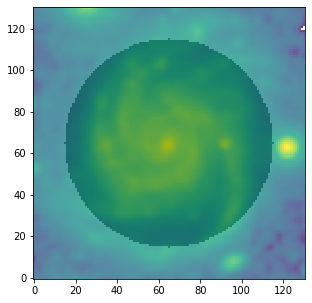

In [10]:
# ellipse center
y_cent = (stamp_size[0]-1)/2
x_cent = (stamp_size[1]-1)/2 

# ellipticity and position angle. Let's assume circular and choose arbitrary position angle.
ell = 0.0  
pa = 45.0

# radius
radius_sma = 50.0 

gal_region2 = img_process.galaxy_region(use_ellipse=True, x_cent=x_cent, y_cent=y_cent, 
                                        ell=ell, pa=pa, radius_sma=radius_sma) 

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region2, origin='lower', cmap='Greys', alpha=0.2)

## 2.4. Calculate E(B-V) associated with the foreground Galactic dust 
<font size="4"> First, we need to estimate the level of attenuation by the foreground galactic dust in the form of E(B-V) parameter. This value can be estimated using the `EBV_foreground_dust` function in **piXedfit**. The inputs are the attenuation level ($A_{\lambda}$) in SDSS bands associated with the galaxy's coordinate on the sky, which can be obtained from the NED data base here https://ned.ipac.caltech.edu/forms/calculator.html. </font>   

In [11]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Alambda_SDSS = []
Alambda_SDSS.append(0.170)
Alambda_SDSS.append(0.132)
Alambda_SDSS.append(0.092)
Alambda_SDSS.append(0.068)
Alambda_SDSS.append(0.051)

Gal_EBV = EBV_foreground_dust(Alambda_SDSS)
print (Gal_EBV)

0.03370103765151496


## 2.5. Calculate fluxes of pixels and get final reduced data
<font size="4"> This can be done using the instance method of `flux map`. We need to select the galaxy region. Let's use the one we obtained based on the SEP segmentation above. For convenience, let's call the final reduced data here as `photometric data cube`.

In [12]:
name_out_fits = "fluxmap_ngc309.fits"
flux_maps = img_process.flux_map(output_stamps=output_stamps, gal_region=gal_region1, Gal_EBV=Gal_EBV,
                                 name_out_fits=name_out_fits)

## 2.6. Check result of image processing: photometric data cube

In [13]:
hdu = fits.open("fluxmap_ngc309.fits")
hdu.info()
header = hdu[0].header
print (header)

# get unit of flux in erg/s/cm2/A
unit_flux = float(header['unit'])

# get maps
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data*unit_flux
flux_err_map = hdu['FLUX_ERR'].data*unit_flux
hdu.close()

Filename: fluxmap_ngc309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      33   (131, 131, 12)   float64   
  1  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
  2  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  3  STAMP_IMAGE    1 ImageHDU       107   (131, 131)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  131                                                  NAXIS2  =                  131                                                  NAXIS3  =                   12                                                  EXTEND  =                    T                                                  NFILTERS=                   12                                          

<font size="4"> __Get central wavelengths of the filters__ to be used for plotting SEDs of pixels. This can be get using `piXedfit.utils.filtering.cwave_filters` function. </font>

In [14]:
# number of filters:
nbands = len(filters)
print (nbands)

from piXedfit.utils.filtering import cwave_filters

photo_wave = cwave_filters(filters)

12


### 2.6.1. Plot maps of fluxes, flux uncertainties, and S/N

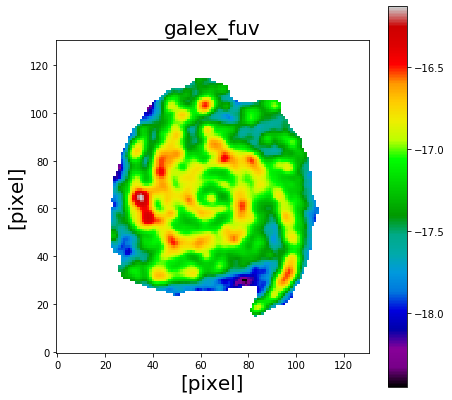

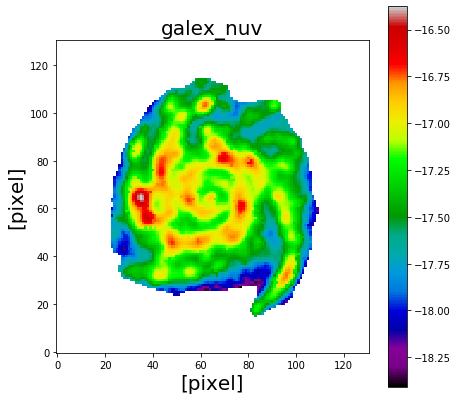

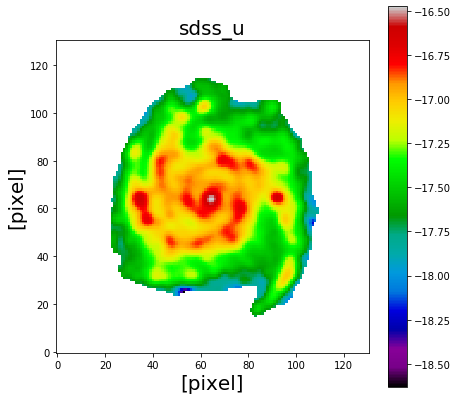

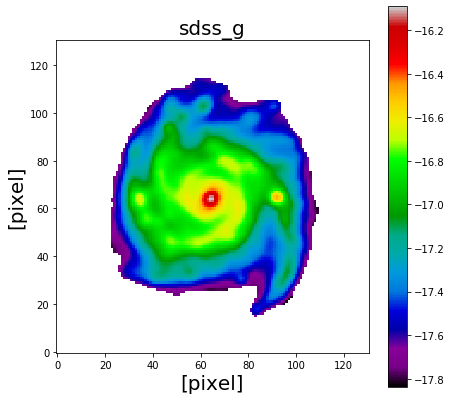

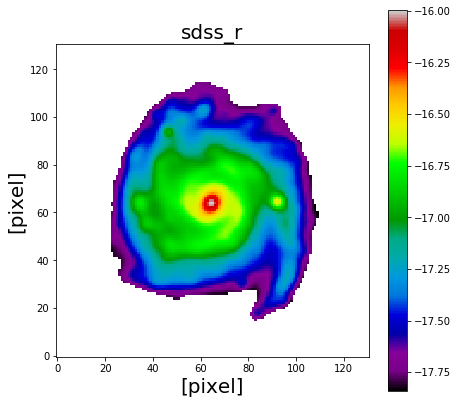

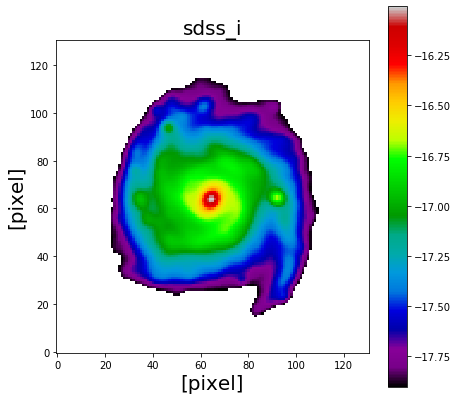

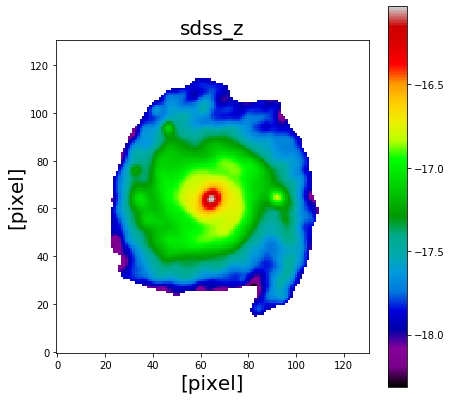

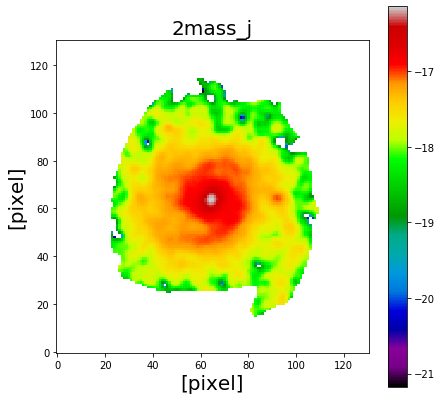

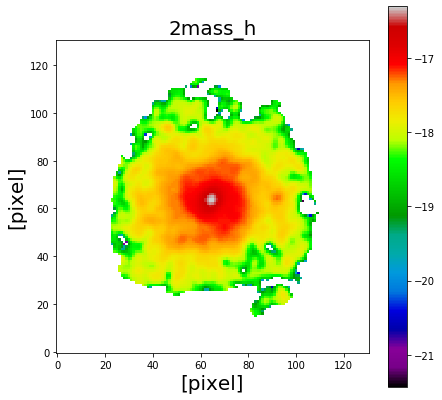

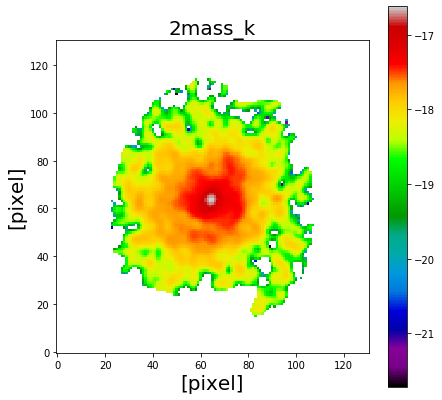

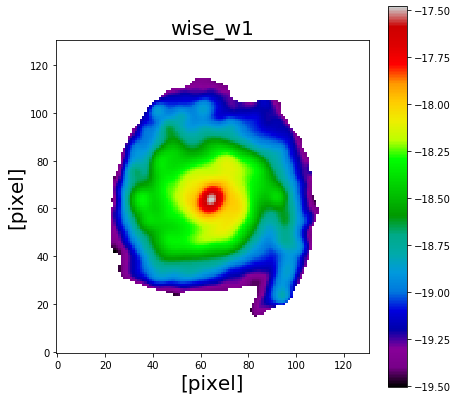

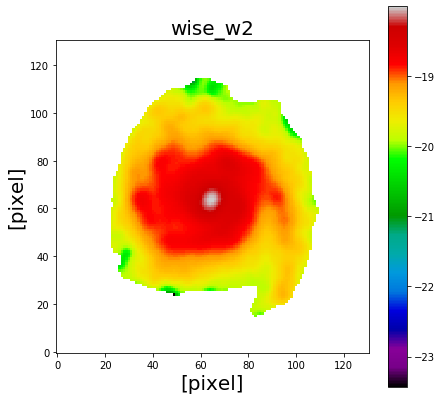

In [15]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

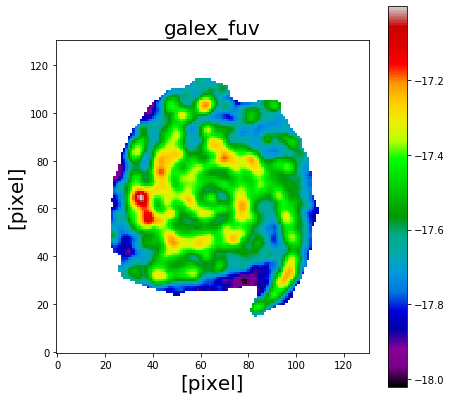

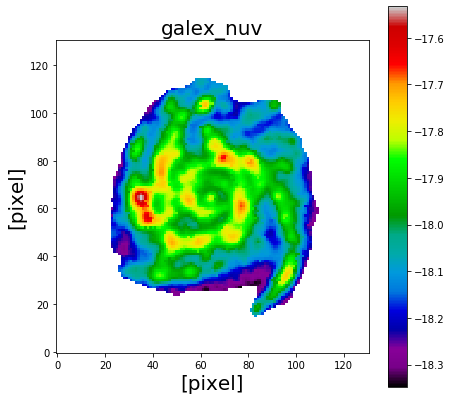

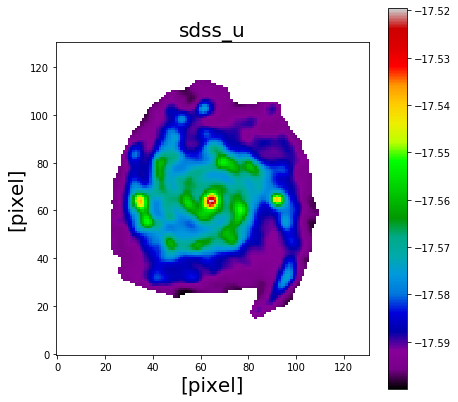

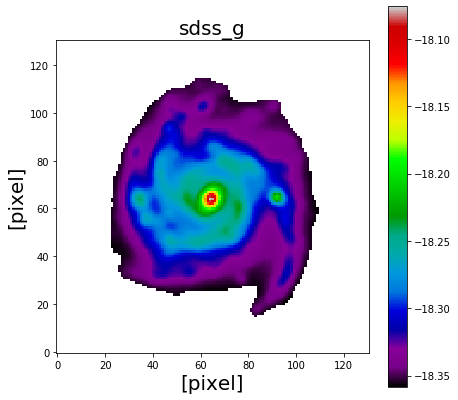

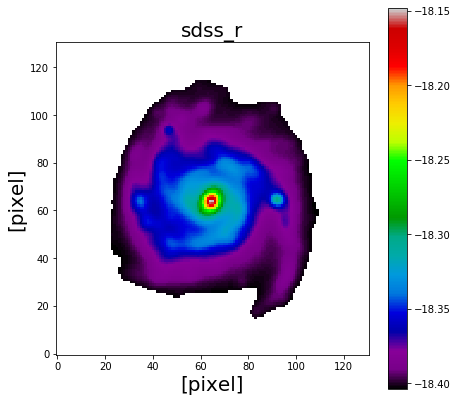

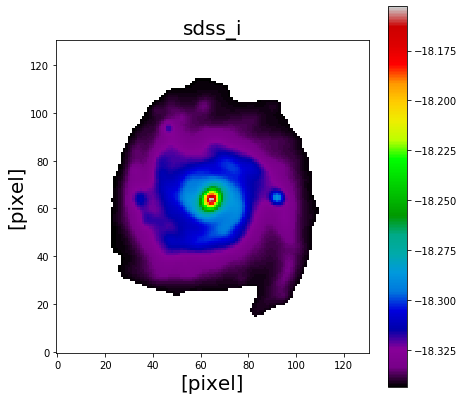

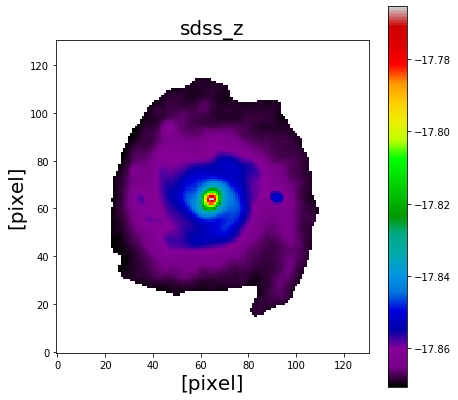

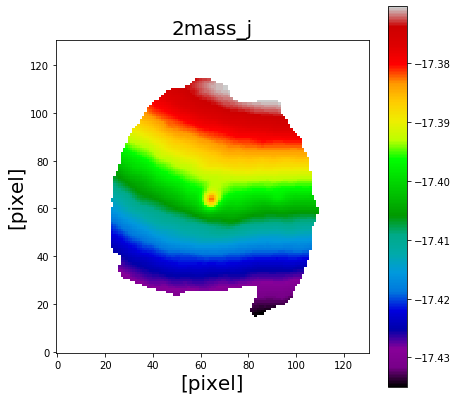

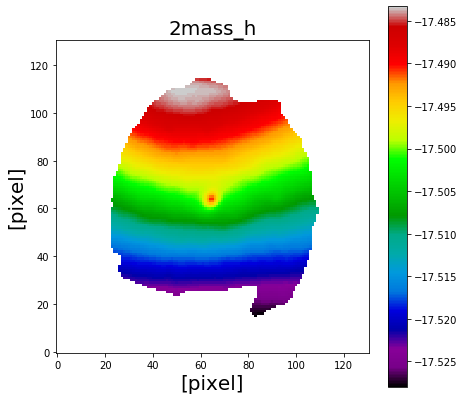

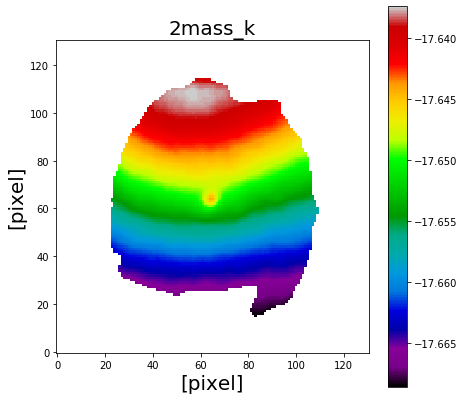

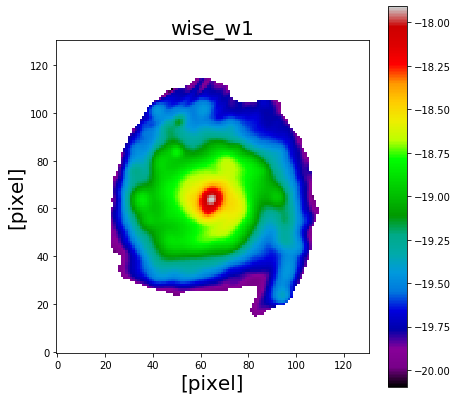

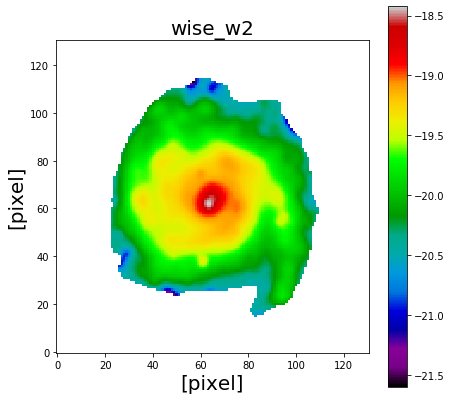

In [16]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_err_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

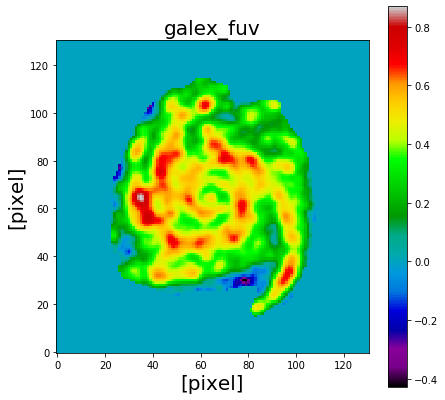

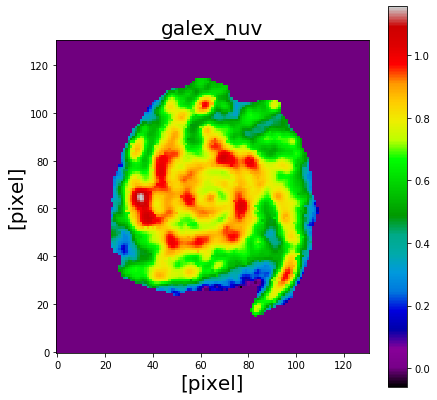

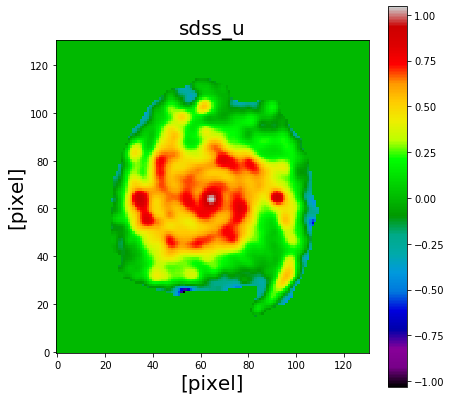

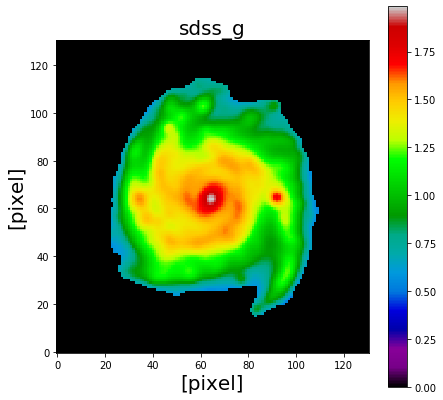

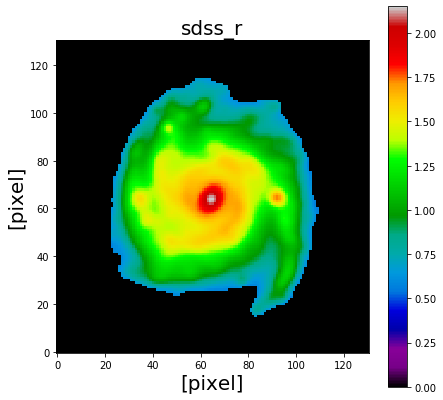

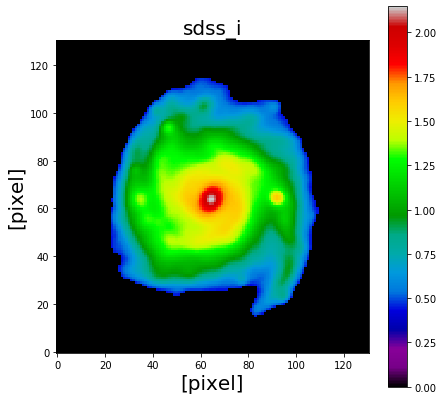

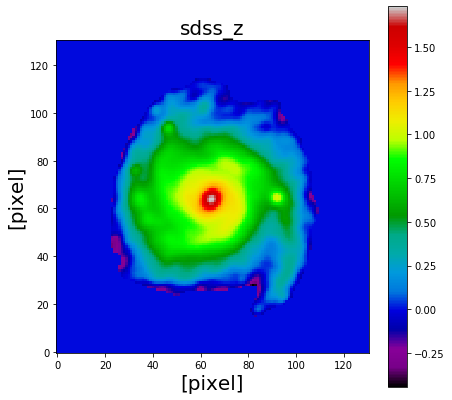

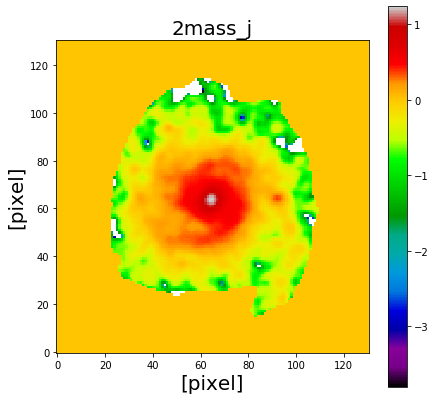

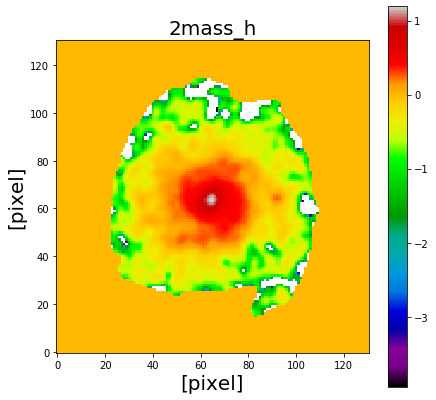

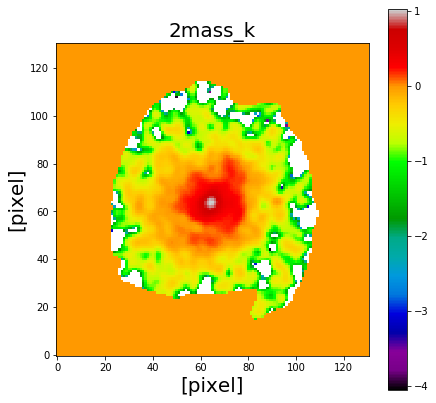

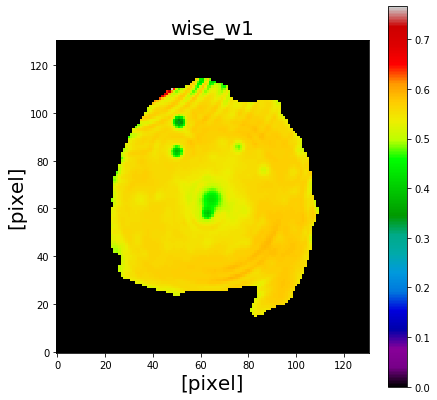

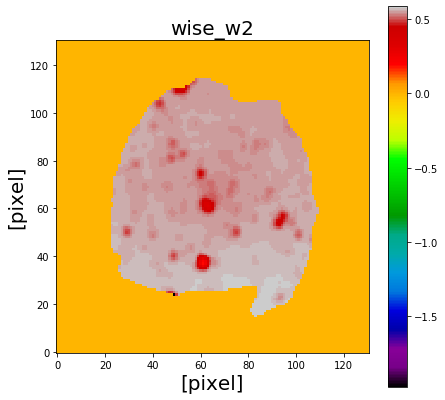

In [17]:
# check S/N maps
# please ignore region outside of the galaxy region we defined above
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[bb]/flux_err_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

### 2.6.2. Check SEDs of some pixels

In [18]:
## transpose from (band,y,x) => (y,x,band):
pix_SED_flux = np.transpose(flux_map, axes=(1,2,0))
pix_SED_flux_err = np.transpose(flux_err_map, axes=(1,2,0))

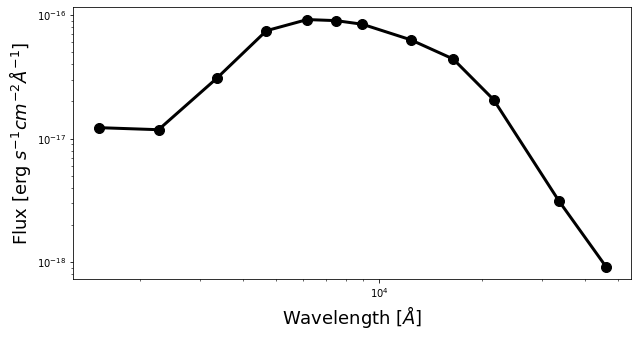

In [23]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 65
pos_x = 65

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

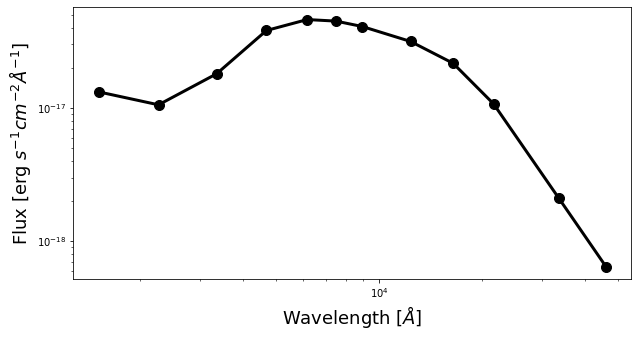

In [24]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 60
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

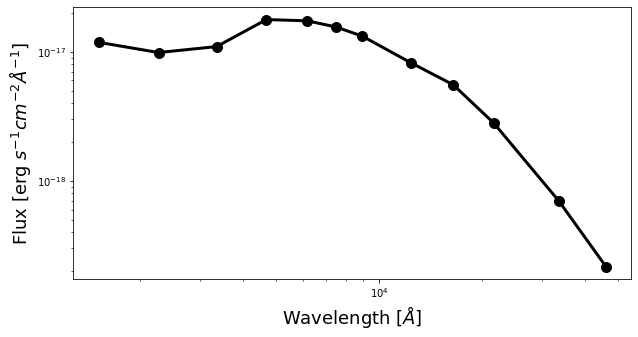

In [25]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 50
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

<font size="4"> Plot a collection of pixels.

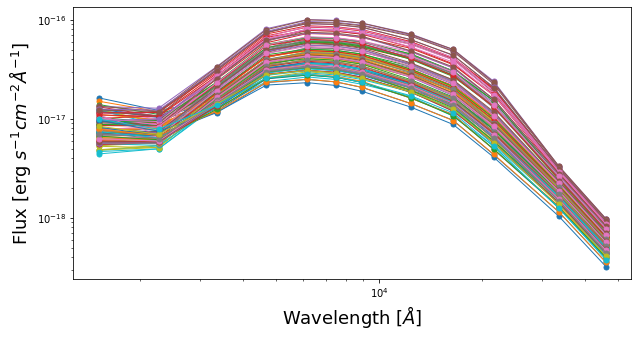

In [26]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()

f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

for yy in range(60,70):
    for xx in range(60,70):
        pos_y = yy
        pos_x = xx
        plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                         fmt='-o', markersize=5, lw=1)

plt.show()